# Kemboi Elly Kiplimo
## DS-FT05
## Phase 4 Project
# MovieLens: Building a Model for Personalized Movie Recommendations Based on User Ratings"
<img >

## Project Overview
Movie recommendation systems are becoming increasingly important in the age of personalized content. In this project, we will build a model that provides top 5 movie recommendations to a user based on their ratings of other movies. We will use the open-source MovieLens dataset from GroupLens, which contains 100K data points of various movies and user

## a. Data Analytic Question
How can we provide top 5 movie recommendations to a user based on their ratings of other movies?

###  Problem Statement
The goal of this project is to build a movie recommendation system from the GroupLens research lab at the University of Minnesota that can provide personalized movie recommendations to users based on their ratings of other movies. The system should be able to handle the cold start problem and provide accurate recommendations to users.

###  Main Objectives
1. Build a movie recommendation system using collaborative filtering
2. Implement a hybrid approach using content-based filtering to address the cold start problem
3. Provide top 5 movie recommendations to a user based on their ratings of other movies

### Specific Objectives
1. Preprocess and clean the MovieLens dataset
2. Build a collaborative filtering model to provide movie recommendations
3. Implement a content-based filtering approach to address the cold start problem
4. Evaluate the performance of the recommendation system using regression metrics such as RMSE and MAE

## b. Metric of Success
The success of the project will be measured by the accuracy of the movie recommendations provided by the system. We will evaluate the performance of the system using regression metrics such as RMSE and MAE. The system should be able to provide accurate recommendations to users and handle the cold start problem effectively.

## c. Experimental Design
1. Importing Libraries
2. Loading data
3. Exploratory Data Analysis
4. Preparing for Collaborative Filtering
5. Building Collaborative Filtering Model
6. Building Content Based Filtering Model
7. Testing the Recommendation System
8. Conclusions and Recommendations
## d. Data Understanding




### 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, SVD         
from surprise.model_selection import cross_validate 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


### 2. Loading the Data

In [3]:
links = pd.read_csv('data/ml-latest-small/links.csv')
movie = pd.read_csv('data/ml-latest-small/movies.csv')
rating = pd.read_csv('data/ml-latest-small/ratings.csv')
tags = pd.read_csv('data/ml-latest-small/tags.csv')

In [4]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### 3. Exploratory Data Analysis
We can explore the movie dataset by looking at the genre breakdown and the rating distribution.

<Axes: title={'center': 'Movie Genres'}>

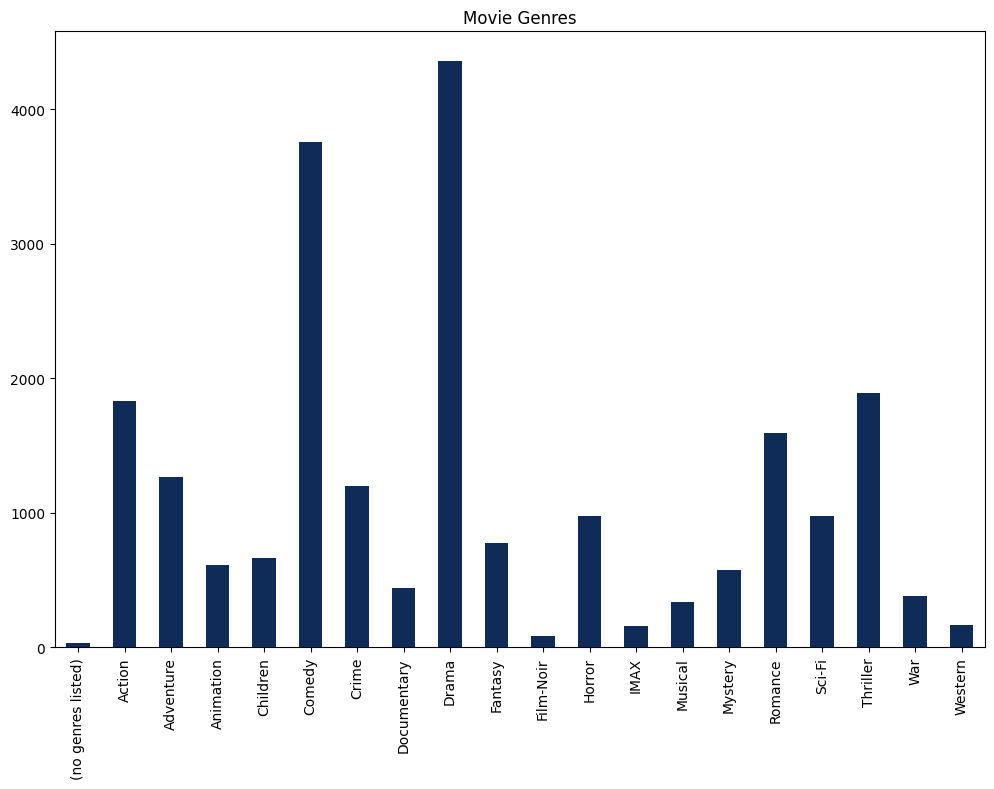

In [15]:
# Genre breakdown
genre_count = movie['genres'].str.get_dummies().sum()
fig, ax = plt.subplots(figsize=(12,8))
genre_count.plot(kind='bar', ax=ax, title='Movie Genres', color='#0F2C59')

We can see that drama is the most common genre and film noir is the least common genre.

<Axes: title={'center': 'Top 10 Movies by Average Rating'}, ylabel='movieId'>

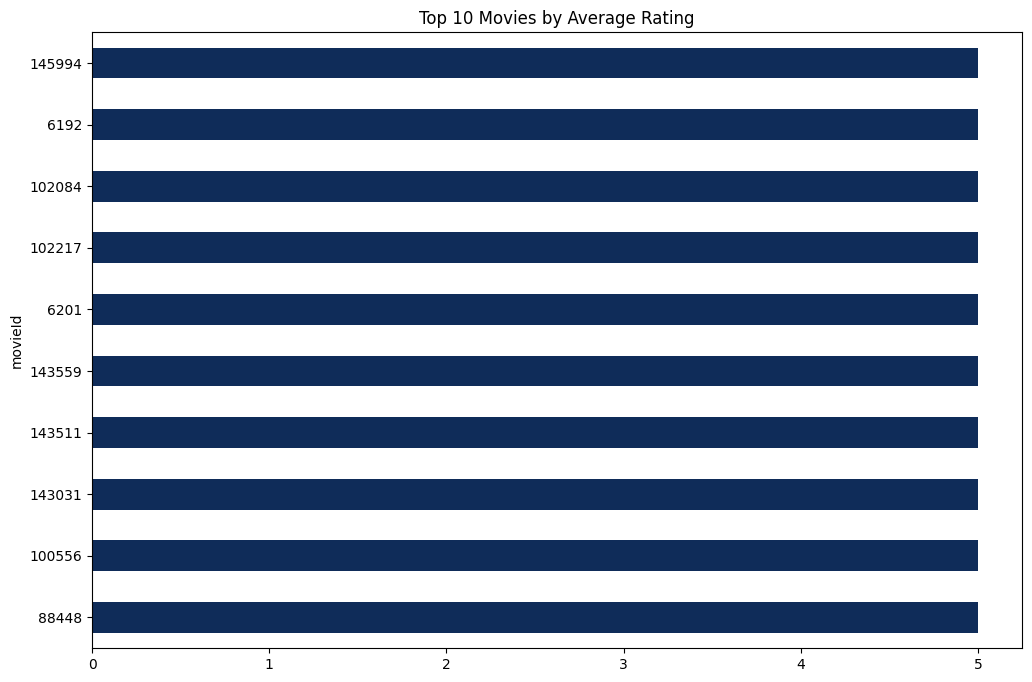

In [16]:
#Top rated movies
top_movies = rating.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)
top_movies.plot(kind='barh', figsize=(12, 8),  color='#0F2C59', title='Top 10 Movies by Average Rating')

The graph shows the movies with the highest average ratings of 5

#### How many users, movies and ratings are in the dataset?

In [ ]:
print("Movies:", rating.movieId.nunique())
print("Users:", rating.userId.nunique())
print("Ratings:", rating.shape[0])

Movies: 9724
Users: 610
Ratings: 100836


We then check for the Ratings distribution

Rating distribution: rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64


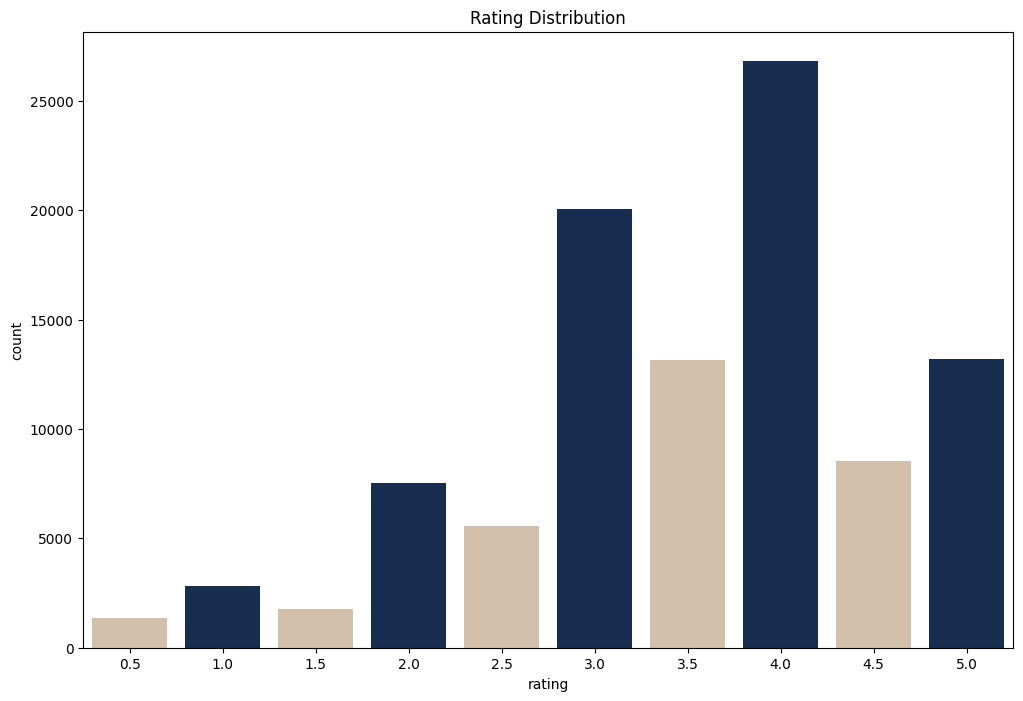

In [ ]:
print("Rating distribution:", rating.rating.value_counts())

plt.figure(figsize=(12, 8))
sns.countplot(data = rating, x = 'rating',  palette=['#DAC0A3',"#0F2C59"])
plt.title("Rating Distribution")
plt.show()

We can explore user activity

((array([310.,  97.,  58.,  35.,  20.,  14.,  11.,  14.,   9.,   6.,   5.,
           4.,   2.,   4.,   0.,   3.,   2.,   4.,   1.,   2.,   1.,   0.,
           1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   1.]),
  array([  20.  ,   73.56,  127.12,  180.68,  234.24,  287.8 ,  341.36,
          394.92,  448.48,  502.04,  555.6 ,  609.16,  662.72,  716.28,
          769.84,  823.4 ,  876.96,  930.52,  984.08, 1037.64, 1091.2 ,
         1144.76, 1198.32, 1251.88, 1305.44, 1359.  , 1412.56, 1466.12,
         1519.68, 1573.24, 1626.8 , 1680.36, 1733.92, 1787.48, 1841.04,
         1894.6 , 1948.16, 2001.72, 2055.28, 2108.84, 2162.4 , 2215.96,
         2269.52, 2323.08, 2376.64, 2430.2 , 2483.76, 2537.32, 2590.88,
         2644.44, 2698.  ]),
  <BarContainer object of 50 artists>),
 [Text(0.5, 1.0, 'Distribution of user ratings'),
  Text(0.5, 0, 'Number of rati

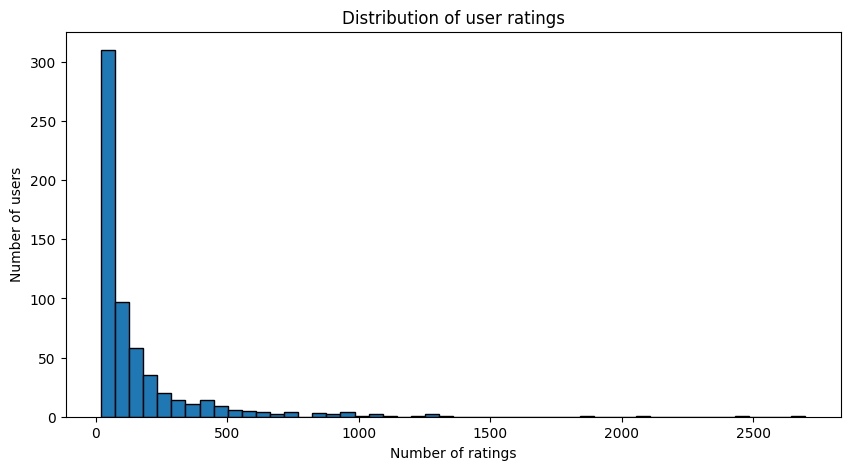

In [20]:
user_ratings = rating['userId'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(user_ratings, bins=50, edgecolor='black'), ax.set(title='Distribution of user ratings', xlabel='Number of ratings', ylabel='Number of users')

### 4. Preparing the data for Collaborative Filtering

In [ ]:
#Create Reader class instance
reader = Reader(rating_scale=(0.5,5))
#Load data and pass user id, movie ide, and rating column as input
data = Dataset.load_from_df(rating[['userId','movieId','rating']], reader)

In [ ]:
#Check for the sum of null values in the links dataframe
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [ ]:
#Dropping the rows with null
links = links.dropna(subset=['tmdbId'])
#Converting tmbId datatype to int
links['tmdbId'] = links['tmdbId'].astype('int')

In [ ]:
#Merge the movielens and tmbd datasets using movieid column  
movie = movie.merge(links, left_on='movieId', right_on='movieId')
#Merge the movie dataset and ratings
movie_and_ratings = movie.merge(rating, on='movieId')

In [ ]:
#Confirming the merged dataframe
movie_and_ratings

,movieId,title,genres,imdbId_x,tmdbId_x,imdbId_y,tmdbId_y,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,114709,862,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,114709,862,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,114709,862,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,114709,862,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,114709,862,17,4.5,1305696483
...,...,...,...,...,...,...,...,...,...,...
100818,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131,5476944,432131,184,4.0,1537109082
100819,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030,5914996,445030,184,3.5,1537109545
100820,193585,Flint (2017),Drama,6397426,479308,6397426,479308,184,3.5,1537109805
100821,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455,8391976,483455,184,3.5,1537110021


### 5. Collaborative Filtering Model

In [ ]:
#Creating a svd algorithm
#Use the cross_validate function to apply K-fold cross-validation on the data for the SVD model
#Set the number of folds to 5 for the cross-validation
#The evaluation metrics used are RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error)
#Set the verbose parameter to True to show more details during cross-validation
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8739  0.8741  0.8676  0.8710  0.8842  0.8742  0.0055  
MAE (testset)     0.6713  0.6728  0.6628  0.6704  0.6809  0.6716  0.0058  
Fit time          1.03    1.02    1.09    1.02    1.04    1.04    0.03    
Test time         0.18    0.21    0.13    0.12    0.13    0.15    0.03    


{'test_rmse': array([0.87386766, 0.87409401, 0.86764428, 0.87101403, 0.88423367]),
 'test_mae': array([0.67126038, 0.67275383, 0.66282445, 0.67038939, 0.68086948]),
 'fit_time': (1.0321087837219238,
  1.018277883529663,
  1.0901145935058594,
  1.022503137588501,
  1.0431993007659912),
 'test_time': (0.17942190170288086,
  0.20947909355163574,
  0.12865996360778809,
  0.121673583984375,
  0.12962651252746582)}

### 6. Content-Based Filtering

In [ ]:
#Create a TF-IDF vectorizer object called 'tfidf' with English stop words.
tfidf = TfidfVectorizer(stop_words='english')

#Fill missing values in the 'genres' column of a DataFrame 'movie' with empty string
movie['genres'] = movie['genres'].fillna('') 

#Use the TF-IDF vectorizer to transform the 'genres' column of 'movie' into a TF-IDF matrix called 'tfidf_matrix.'
tfidf_matrix = tfidf.fit_transform(movie['genres'])

#Calculating the cosine similarity between rows of 'tfidf_matrix' using the 'linear_kernel' function, resulting in a similarity matrix called 'cosine_sim.' This matrix will help determine the similarity between movies based on their genre descriptions.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Define a function 'content_based_recommend_movies' that takes a movie title and an optional parameter 'n' (default is 10) for the number of recommendations

In [ ]:
#Create a Pandas Series named 'indices' with movie indices as values and movie titles as the index, removing duplicates.
indices = pd.Series(movie.index, index=movie['title']).drop_duplicates()

#Define a function 'content_based_recommend_movies' that takes a movie title and an optional parameter 'n' (default is 10) for the number of recommendations.
def content_based_recommend_movies(title, n=10):
    #Retrieve the index of the input movie title from the 'indices' Series.
    index = indices[title]

    #Calculate cosine similarity scores between the input movie and all other movies, storing them as a list of tuples.
    sim_scores = list(enumerate(cosine_sim[index]))

    #Sorting the similarity scores in descending order.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Select the top 'n' similar movies (excluding the input movie itself).
    sim_scores = sim_scores[1:n+1]

    #Extract the indices of the recommended movies.
    movie_indices = [i[0] for i in sim_scores]

    #Return the titles of the recommended movies based on their indices from the 'movie' DataFrame.
    return movie['title'].iloc[movie_indices]

Define a function 'combined_collab_and_content_based_recs' that takes a user ID, a movie title, and an optional parameter 'n' (default is 10) for the number of recommendations.

In [ ]:
#Define a function 'combined_collab_and_content_based_recs' that takes a user ID, a movie title, and an optional parameter 'n' (default is 10) for the number of recommendations.
def combined_collab_and_content_based_recs(user_id, title, n=10 ):
    #Generate content-based movie recommendations using the 'content_based_recommend_movies' function, store them in a DataFrame, and rename the column to 'title.'
    cont_based = content_based_recommend_movies(title, n).to_frame()
    cont_based.columns = ['title']

    #Merge the content-based recommendations DataFrame with 'movie_and_ratings' on the 'title' column.
    content_based_recommend = cont_based.merge(movie_and_ratings, on='title')

    #Remove duplicate movie titles from the merged DataFrame, keeping only the first occurrence.
    content_based_recommend = content_based_recommend.drop_duplicates(subset=['title'], keep='first')
    
    #Estimate user ratings for the recommended movies using collaborative filtering with Singular Value Decomposition (SVD).
    content_based_recommend['est'] = content_based_recommend['movieId'].apply(lambda x: svd.predict(user_id, x).est)

    #Sort the DataFrame of recommendations by estimated ratings ('est') in descending order.
    content_based_recommend = content_based_recommend.sort_values(by='est', ascending=False)

    #Return the top 'n' movie titles with the highest estimated ratings as recommendations for the user.
    return content_based_recommend.head(n)['title']

### 7. Testing the Recommendation System

In [ ]:
user_id = 2
title = "Flint (2017)"
n = 5

# Call the 'combined_collab_and_content_based_recs' function with the specified user ID, movie title, and the number of recommendations.
rec = combined_collab_and_content_based_recs(user_id, title, n)

#Convert the recommendations 'rec' to a list of recommended movie titles and store them in 'recommended_movies.'
recommended_movies = rec.tolist()

#Print a message indicating the top 5 recommended movies for user
print(f"Top {n} recommended movies for user {user_id} are {title}:")

#Iterate through the 'recommended_movies' list, numbering each recommendation, and print them in the specified format with their titles.
for i, movie_title in enumerate(recommended_movies, start=1):
    print(f"{i}. {movie_title}")

Top 5 recommended movies for user 2 are Flint (2017):
1. Cry, the Beloved Country (1995)
2. Georgia (1995)
3. Othello (1995)
4. Restoration (1995)
5. Dangerous Minds (1995)


### 8. Conclusions